# 计算机上的微分

庞龙刚 @ 华中师范大学 CCNU

## 学习目标

学会在计算机上以解析或数值的方式计算函数微分 

$$ f'(x) = {df \over dx} $$ 

比如：$f(x) = sin(x)$, 要编程计算
- diff(f, x)=cos(x) 
- diff(f, x=5) = cos(5).

## 学习内容

- Sympy 解析微分
- 数值微分：有限差分近似 （Finite Difference）
- 自动微分：科学计算与人工智能的交叉 (Auto Differentiation)

## 解析微分

- 需要使用计算机代数 （CAS）, 又称“符号计算系统”
- 最著名的软件：Mathematica 
- Python 中的符号计算库：sympy 

## Sympy 做解析函数微分

- Step1: 定义自变量符号
- Step2: 定义解析函数的形式
- Step3: 使用 sympy.diff 函数返回函数的微分结果

In [1]:
import sympy 

# Step1: define the variable
x = sympy.symbols("x")

In [2]:
# Step2: define the function 
def f(x):
    return x * sympy.exp(- x**2)

f(x)

x*exp(-x**2)

In [3]:
# Step3: calc the differentiation

sympy.diff(f(x), x)

-2*x**2*exp(-x**2) + exp(-x**2)

*小技巧 1:*
写文章的时候打 Latex 公式很麻烦，可以将 sympy 的计算结果输出为 latex 代码。

In [4]:
dfdx = sympy.diff(f(x), x)

sympy.print_latex(dfdx)

- 2 x^{2} e^{- x^{2}} + e^{- x^{2}}


*小技巧2*：使用 subs 函数可以临时将 dfdx 中的 x 替换为特定数值

In [5]:
dfdx.subs(x, 1.)

-0.367879441171442

In [6]:
dfdx.subs(x, 0)

1

## 数值微分：有限差分近似

$$ {df \over dx} = {\rm lim}_{\Delta x\rightarrow 0} {f(x+ \Delta x) - f(x) \over \Delta x } $$


In [7]:
def finite_difference(func, x, dx=0.01):
    assert(dx != 0)
    return (func(x+dx) - func(x)) / dx

finite_difference(f, 0.0)

0.999900004999833

$$ {df \over dx} = - 2 x^{2} e^{- x^{2}} + e^{- x^{2}}$$

- 解析微分在 x=0 处精确值为 1
- 有限差分法在 x=0 处得到近似的数值解： 0.999900004999833


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 这里作图看一下有限差分方法的误差
def comparison(dx):
    xcoord = np.linspace(0, np.pi, 20)
    # 解析微分的结果
    dfdx_ana = [dfdx.subs(x, xi) for xi in xcoord]
    # 有限差分的结果
    dfdx_num = [finite_difference(f, xi, dx) for xi in xcoord] 
    
    plt.plot(xcoord, dfdx_num, 'ko--', label="finite difference")
    plt.plot(xcoord, dfdx_ana, 'r-', label="sympy: analytic")
    
    plt.legend(loc='best')
    plt.xlabel(r"$x$")
    plt.ylabel(r"$df/dx$")

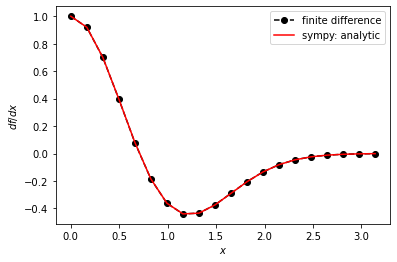

In [9]:
# dx 小的时候，有限差分比较准确
comparison(dx=0.001)

## 问题：是否 dx 越小，有限差分对微分的近似越准确？

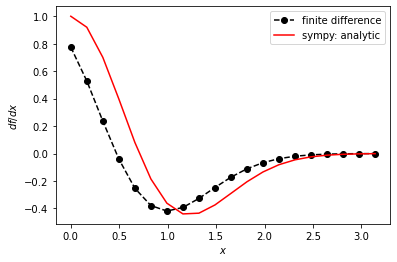

<function __main__.comparison(dx)>

In [10]:
from ipywidgets import interact

# 移动滑钮看到 dx 大的时候，有限差分误差较大
interact(comparison, dx=(0.01, 1))

看起来，好像$\Delta x$ 越小，有限差分法计算数值微分的精度越高。

定量的来说，$\Delta x$ 继续变小，有限差分的精度又会变差。

比如，对下面这个函数，

\begin{align}
f(x) = \sqrt{x}
\end{align}

一阶微分的解析解为 
\begin{align}
f'(x) = {1 \over 2 \sqrt{x}}
\end{align}

使用差分近似，

\begin{align}
{df \over dx}  = {\sqrt{x+\Delta x} - \sqrt{x} \over \Delta x}
\end{align}

**考虑舍入误差，数值计算中要避免两个相近数字的相减** 

而当 $\Delta x$ 非常小时， $\sqrt{x+\Delta x} - \sqrt{x}$ 就是典型的两个相近数字相减的问题。

In [11]:
def check_error(dx=0.1, x0=1.0):
    ana = 0.5
    num = (np.sqrt(x0 + dx) - np.sqrt(x0))/dx
    return np.abs(ana - num)

In [12]:
dx = np.logspace(-16, -1, 10)
err = check_error(dx)
err

array([5.00000000e-01, 2.16194004e-02, 1.39716990e-04, 4.13701855e-08,
       5.40219515e-08, 3.46406653e-09, 1.24941224e-07, 5.80184932e-06,
       2.69014627e-04, 1.19115183e-02])

注意：这里调用 np.logspace 产生从 $10^{-16}$ 到 $10^{-1}$ 的等比序列。

Text(0, 0.5, 'error')

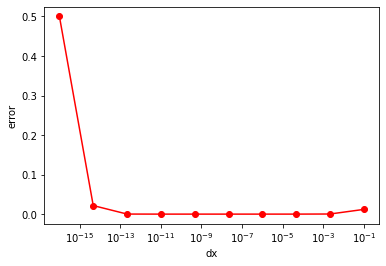

In [13]:
plt.semilogx(dx, err, 'ro-')
plt.xlabel("dx")
plt.ylabel("error")

## 有限差分法的原理（泰勒展开）

$$ f(x + \Delta x) = f(x) + {df \over dx} \Delta x + {d^2 f \over dx^2} {\Delta x^2 \over 2} + ... $$

移项得到一阶精度的**前向**有限差分近似，

$$  {df \over dx}  = {f(x + \Delta x) - f(x) \over \Delta x} + O( \Delta x^2) $$

截断误正比于 $\Delta x^2$, 所以 $\Delta x$ 越小结果越精确。

## 同理得到后向有限差分近似

$$ f(x - \Delta x) = f(x) - {df \over dx} \Delta x + {d^2 f \over dx^2} {\Delta x^2 \over 2} + ... $$

移项得到一阶精度的**后向**有限差分近似，

$$  {df \over dx}  = {f(x) - f(x - \Delta x) \over \Delta x} + O( \Delta x^2) $$

## 前向与后向有限差分，有区别吗？

答案是： Yes

在偏微分方程的数值解中，有时候要构造“迎风法”，使得数值解稳定。举例，

\begin{align}
{\partial f \over \partial t} + u {\partial f \over \partial x} = 0
\end{align}

迎风法考虑信号不能超光速传播，根据对流速度 u 选择前向还是后向差分。
- $u>0$, 选择后向差分
- $u<0$, 选择前向差分

**这部分在以后课程中会讲。**

## 中心差分格式（二阶精度）


$$ f(x + \Delta x) = f(x) + {df \over dx} \Delta x + {d^2 f \over dx^2} {\Delta x^2 \over 2} + ... $$

$$ f(x - \Delta x) = f(x) - {df \over dx} \Delta x + {d^2 f \over dx^2} {\Delta x^2 \over 2} + ... $$

将上面两个泰勒展开公式相减，可以得到**二阶精度的中心差分格式**：

$$  {df \over dx}  = {f(x + \Delta x) - f(x - \Delta x) \over 2 \Delta x} + O( \Delta x^3) $$

## 思考：如何使用下面四个泰勒展开公式，(其中 $h = \Delta x$)

\begin{eqnarray}
f(x - 2 h) & = & f(x) - 2 {df \over dx} h + {d^2 f \over dx^2} {4 h^2 \over 2} - {d^3 f \over dx^3} {8 h^3 \over 6} + ... \\
f(x - h) & = & f(x) - {df \over dx} h + {d^2 f \over dx^2} {h^2 \over 2} - {d^3 f \over dx^3} { h^3 \over 6} +... \\
f(x + h) & = & f(x) + {df \over dx} h + {d^2 f \over dx^2} {h^2 \over 2} + {d^3 f \over dx^3} { h^3 \over 6} +... \\
f(x + 2 h) & = & f(x) + 2 {df \over dx} h + {d^2 f \over dx^2} {4 h \over 2} + {d^3 f \over dx^3} {8 h^3 \over 6} + ... 
\end{eqnarray}

- 得到三阶精度的 $df/dx$ 差分近似公式？
- 得到二阶微分 $d^2 f / dx^2 $ 的差分近似公式？

## 列表函数

对于列表函数，$y=f(x)$, 可以先使用插值算法得到插值多项式，然后求导。


## 自动微分 Auto-differentiation

自动微分编程是一个最近很流行的研究方向。这种方法与传统的数值微分和解析微分都有所不同。

- 数值微分：会引入数值误差
- 解析微分：在函数复杂的时候，根据链式规则，展开项很多，计算速度慢

自动微分保留了数值微分速度快和解析微分结果精确的优点，正成为一种新的计算物理编程范式。

自动微分在人工智能时代开始流行，因为 Tensorflow, pytorch 等深度学习库封装了自动微分功能。


https://www.robots.ox.ac.uk/~tvg/publications/talks/autodiff.pdf

自动微分通过在计算机上实现一些基本算术操作的微分，加上链式规则，自动从用户编写的函数 f(x)，推导出它的微分 f'(x)。

自动微分广泛应用于，

- 人工智能   $ \theta = \theta - \epsilon \partial L / \partial \theta$
- 逆问题    $y = f(x) \rightarrow x = f^{-1}(y)$
- 牛顿法寻根  $x_{n+1} = x_{n} - f(x_n) / f'(x_n)$
- Stiff 常微分方程  $df / dt = s$

**方法**：把所有的数加上一个对偶数 $x \rightarrow x + \dot{x} \mathbf{d}$

其中 $\mathbf{d}$ 是一个符号，像虚数的表示符号 $i$ 一样。不同的是，$i^2 = -1$, 此处 $\mathbf{d}^2 = 0$.

使用这种方法, 用户定义的函数会自动出现一个对偶的自动微分项, 以 $\mathbf{d}$ 标示. 

下面举例说明,

### 自动微分中对偶数的代数运算 (注意 $\mathbf{d}^2 = 0$)

\begin{align}
(x + \dot{x} \mathbf{d}) + (y + \dot{y} \mathbf{d}) &= x + y + (\dot{x} + \dot{y}) \mathbf{d} \\
(x + \dot{x} \mathbf{d}) - (y + \dot{y} \mathbf{d}) &= x - y + (\dot{x} - \dot{y}) \mathbf{d} \\
(x + \dot{x} \mathbf{d}) * (y + \dot{y} \mathbf{d}) &= xy + (x \dot{y} + \dot{x} y) \mathbf{d} \\
{1 \over x + \dot{x} \mathbf{d}}  &= {1\over x} - {\dot{x} \over x^2} \mathbf{d} \quad\; (x \neq 0)
\end{align}

### 将多项式扩展到对偶数域

\begin{align}
P(x) = a_0 + a_1 x + a_2 x^2 + \cdot + a_n x^n
\end{align}

将 x 替换成对偶数， $x \rightarrow x + \dot{x} \mathbf{d}$ 得到，

\begin{align}
P(x + \dot{x} \mathbf{d}) & = a_0 + a_1(x+\dot{x} \mathbf{d}) + a_2(x+\dot{x} \mathbf{d})^2 + \cdot + a_n(x+\dot{x} \mathbf{d})^n \\
&= a_0 + a_1 x + a_2 x^2 + \cdot + a_n x^n + a_1\dot{x} \mathbf{d} + 2 a_2 x \dot{x} \mathbf{d} + \cdot + n a_n x^{n-1}\dot{x} \mathbf{d} \\
&= P(x) + P'(x) \dot{x} \mathbf{d}
\end{align}

- $\dot{x}$ 可任意选择，当对 x 求导时， $\dot{x}=1$, 则对偶的项 $P'(x)$ 为 P(x) 的微分。
- 如果计算机中其它函数比如 cos, sin, log, exp 等都用多项式展开，则用户定义的任何函数都会自动生成其微分对偶。

或者直接对常用的数学函数进行重载，
\begin{align}
sin(x + \dot{x} \mathbf{d}) &= sin(x) + cos(x) \dot{x}\mathbf{d} \\
cos(x + \dot{x} \mathbf{d}) &= cos(x) - sin(x)  \dot{x}\mathbf{d} \\
e^{x + \dot{x} \mathbf{d}} &= e^x + e^x \dot{x} \mathbf{d} \\
\log(x + \dot{x} \mathbf{d}) &= \log(x) + { \dot{x}\over x } \mathbf{d} \quad \; x \neq 0 \\
\sqrt{x + \dot{x} \mathbf{d}} &= \sqrt{x} + { \dot{x}\over 2 \sqrt{x}}\mathbf{d} \quad \; x \neq 0 \\
(x + \dot{x} \mathbf{d})^2 &= x^2 + 2x \dot{x} \mathbf{d} \\
\end{align}

In [14]:
# 简单举例  f(x) = x e^{-x^2}

def f(x):
    w1 = x
    w2 = w1 * w1
    w3 = np.exp(- w2)
    w4 = w1 * w3
    return w4

f(1.0)

0.36787944117144233

In [15]:
## 自动微分版本

def f_ad(x):
    w1 = x
    dw1 = 1
    
    w2 = w1 * w1
    dw2 = 2 * w1 * dw1
    
    w3 = np.exp(-w2)
    dw3 = - np.exp(-w2) * dw2
    
    w4 = w1 * w3
    dw4 = w1 * dw3 + dw1 * w3
    
    return w4, dw4

In [16]:
f_ad(1.0)

(0.36787944117144233, -0.36787944117144233)

In [17]:
dfdx.subs(x, 1.)

# dfdx 是前面用 sympy 计算出的解析微分
# 两者在小数点后 15 位都保持一致

-0.367879441171442

### 运算符重载的方法实现自动微分编程

举例：计算机如何做复数的加减乘除

\begin{align}
z_1 &= x_1 + i y_1 \\
z_2 &= x_2 + i y_2
\end{align}

底层语言只实现了实数的加减乘除，但是使用复数库，可以直接计算

- $z_1 + z_2$
- $z_1 - z_2$
- $z_1 * z_2$
- $z_1 / z_2$

复数库对 +， -， *， / 符号做了重载。

In [1]:
class DNumber:
    '''自动微分中的对偶数类，对 +， -， *， /，幂次符号做了重载'''
    def __init__(self, x, dx):
        self.val = x
        self.dval = dx
    
    def __repr__(self):
        '''使用 print(DNumber(1, 2)) 时输出：1 + 2 d'''
        return f'{self.val} + {self.dval} d'
        
    def __add__(self, other):
        '''overload a + b'''
        if isinstance(other, float) or isinstance(other, int):
            val = self.val + other
            dval = self.dval
        if isinstance(other, DNumber):
            val = self.val+other.val
            dval = self.dval + other.dval
            
        return DNumber(val, dval)
    
    def __iadd__(self, other):
        '''overload a += b'''
        self.val = self.val + other.val
        self.dval = self.dval + other.dval
        return self
    
    def __mul__(self, other):
        ''' overload x * y  or const * x
        (x + dx d)*(y + dy d) = x*y + (xdy + ydx) d'''
        if isinstance(other, float) or isinstance(other, int):
            val = other * self.val
            dval = other * self.dval
        
        if isinstance(other, DNumber):
            val = self.val * other.val
            dval = self.val * other.dval + other.val * self.dval
            
        return DNumber(val, dval)
    
    def __rmul__(self, other):
        return self.__mul__(other)
    
    def __pow__(self, n):
        if isinstance(n, float) or isinstance(n, int):
            val = self.val**n
            dval = n * self.val**(n-1) * self.dval
        elif isinstance(n, DNumber) :
            raise(Exception("Pow(DNumber, DNumber) is not implemented yet"))
        return DNumber(val, dval)

In [19]:
s = DNumber(0.1, 1)
s + DNumber(0.2, 0)

0.30000000000000004 + 1 d

In [20]:
s += DNumber(0.2, 0)

In [21]:
s

0.30000000000000004 + 1 d

In [22]:
x = DNumber(0.1, 1)
x * x

0.010000000000000002 + 0.2 d

In [23]:
x**3

0.0010000000000000002 + 0.030000000000000006 d

### 多个变量的自动微分

上面例子中 f(x) 是 x 的单变量函数，$\dot{x}=1$. 

如果是多变量函数 f(x, y), 要求对 x 求微分，则应取

$\dot{x}=1, \dot{y}=0$.

举例说明：

$f(x, y)= 3 x^2  y + x$

${\partial f \over \partial x} = 6 x y + 1$

在 (x, y) = (1, 1) 时，$f(x, y)=4.0$, $df/dx = 7.0$。

In [1]:
def f2d(x, y):
    '''
    Args: 
    :x: DNumber
    :y: DNumber
    :return: f(x, y) = 3*x**2*y + x 
    and \partial f/\partial x '''
    return 3 * x**2 * y + x

In [25]:
# 求 (x,y)=(1,1) 时 f(x, y) 与 df/dx
x = DNumber(1.0, 1.0)
y = DNumber(1.0, 0.0)
print("x =", x)
print("y =", y)
print("3x^2 y + x = ", f2d(x, y))

x = 1.0 + 1.0 d
y = 1.0 + 0.0 d
3x^2 y + x =  4.0 + 7.0 d
